In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('movies.csv')

We have already cleaned and explored the quantitative variables fairly extensively in our previous notebook (data_wrangling). We will now turn to categorical variables and do some further exploration on the affect of genre on revenue.

In [3]:

df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)


In [4]:
df.head()

,budget,genres,original_language,popularity,release_date,runtime,Keywords,cast,crew,revenue,...,crew_Jane Jenkins,crew_John Debney,crew_John Papsidera,crew_Hans Zimmer,crew_Francis Ford Coppola,crew_Mindy Marin,crew_Billy Hopkins,crew_Danny Elfman,crew_Sarah Finn,crew_Mark Isham
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2015-02-20,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",16.326300,...,0,0,0,0,0,0,0,0,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,2004-08-06,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",18.370959,...,0,1,0,0,0,0,0,0,0,0
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,2014-10-10,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",16.387512,...,0,0,0,0,0,0,0,0,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,2012-03-09,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16.588099,...,0,0,0,0,0,0,0,0,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,2009-02-05,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",15.182614,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'Keywords', 'cast', 'crew', 'revenue',
       ...
       'crew_Jane Jenkins', 'crew_John Debney', 'crew_John Papsidera',
       'crew_Hans Zimmer', 'crew_Francis Ford Coppola', 'crew_Mindy Marin',
       'crew_Billy Hopkins', 'crew_Danny Elfman', 'crew_Sarah Finn',
       'crew_Mark Isham'],
      dtype='object', length=180)

In [6]:
df['release_date'] = df['release_date'].apply(pd.to_datetime)

In [7]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['weekday'] = df['release_date'].dt.weekday

In [8]:


def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d


In [9]:

df['genre_name'] = pd.Series(dtype='object')
j = 0
for i in df['genres']:
    d = get_dictionary(i)
    if d != {}:
        df['genre_name'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df['genre_name'].iloc[j] = np.NaN
    j += 1
df.is_copy = False

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
df.drop(labels=['genres'],axis=1,inplace=True)

We will examine the primary and secondary genres of each movie. Some movies have a large number of genres (5+), while the majority have just 1-2. Less than half have a third genre.

In [11]:
df['main_genre'] = ""
print(df['genre_name'].isna().sum())
df['genre_name'].fillna('None',inplace=True)
print(df['genre_name'].isna().sum())

7
0


In [12]:
ind = 0
for sublist in df['genre_name']:
    if sublist!= 'None':
        df['main_genre'].loc[ind] = sublist[0]
    else:
        df['main_genre'].loc[ind] = sublist
    ind +=1

In [13]:
#Average revenue by main genre
genre_avg_rev = df.groupby('main_genre')['revenue'].mean()
genre_avg_rev

main_genre
Action             16.700882
Adventure          17.728111
Animation          17.016064
Comedy             16.047810
Crime              15.343055
Documentary        12.291062
Drama              15.322636
Family             16.677994
Fantasy            16.366933
Foreign            11.831769
History            15.500941
Horror             16.081515
Music              16.389770
Mystery            15.773284
None               12.994589
Romance            15.796543
Science Fiction    16.979490
TV Movie           17.553180
Thriller           15.739963
War                15.518680
Western            15.667336
Name: revenue, dtype: float64

In [14]:
df['main_genre'].value_counts()

Drama              785
Comedy             604
Action             520
Adventure          187
Horror             170
Crime              147
Thriller           116
Animation           76
Documentary         71
Fantasy             68
Romance             67
Science Fiction     41
Family              36
Mystery             33
War                 20
Music               20
History             16
Western             13
None                 7
Foreign              2
TV Movie             1
Name: main_genre, dtype: int64

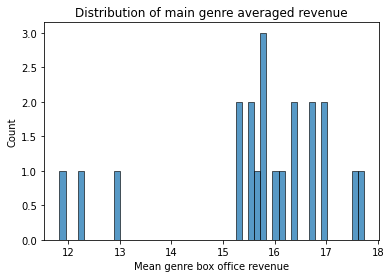

In [15]:
sns.histplot(x=genre_avg_rev,bins=50)
plt.title('Distribution of main genre averaged revenue')
plt.xlabel('Mean genre box office revenue')
plt.ylabel('Count')
plt.show()

We can see that the revenue distributions of films by main genre differ.

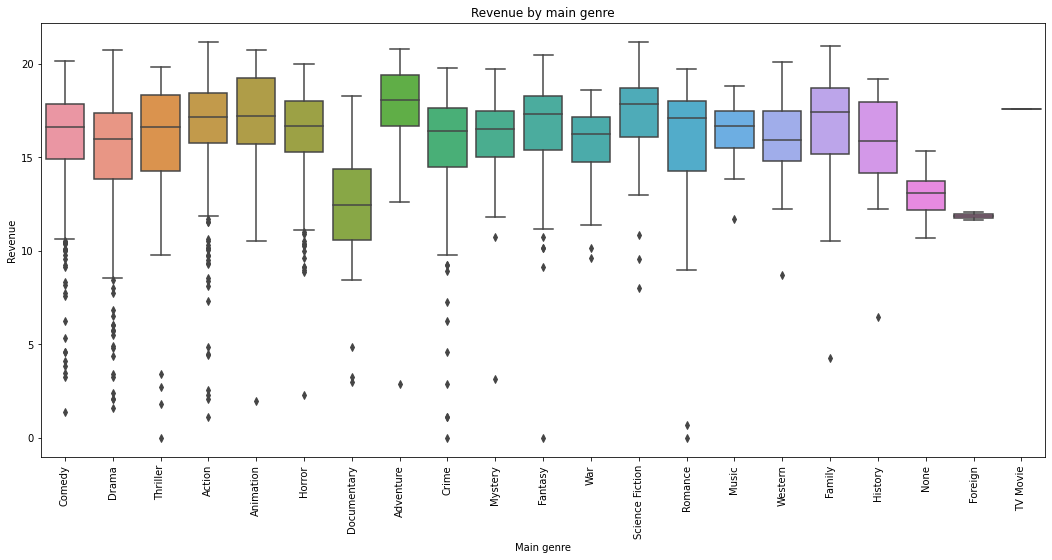

In [16]:
plt.subplots(figsize=(18,8))
sns.boxplot(x='main_genre',y='revenue',data=df)
plt.xlabel('Main genre')
plt.xticks(rotation='vertical')
plt.ylabel('Revenue')
plt.title('Revenue by main genre')
plt.show()

We can clearly see that even just looking at the main genre the revenue distributions show differences that might be useful. We will therefore now create dummy variables for tracking all the genres associated with a film, first by main genre, then by adding other genres listed.

In [17]:
#create dummy variables for tracking the main genres

dummies = pd.get_dummies(df['main_genre'])

df = df.drop('main_genre',axis = 1)
# Join the encoded df
df = df.join(dummies)
df.head()

,budget,original_language,popularity,release_date,runtime,Keywords,cast,crew,revenue,homepage_bool,...,Horror,Music,Mystery,None,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,14000000,en,6.575393,2015-02-20,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",16.326300,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000,en,8.248895,2004-08-06,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",18.370959,0,...,0,0,0,0,0,0,0,0,0,0
2,3300000,en,64.299990,2014-10-10,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",16.387512,1,...,0,0,0,0,0,0,0,0,0,0
3,1200000,hi,3.174936,2012-03-09,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16.588099,1,...,0,0,0,0,0,0,0,1,0,0
4,0,ko,1.148070,2009-02-05,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",15.182614,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.columns[183:]

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [19]:
ind = 0
for sublist in df['genre_name']:
    for column in df.columns[183:]:
        if column in sublist[1:]:
            df[column].loc[ind] += 1
    ind += 1
    


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
print(df['genre_name'][:10])
print(df['Drama'][:10])
print(df['Comedy'][:10])
print(df['Drama'].sum())

0                                      [Comedy]
1              [Comedy, Drama, Family, Romance]
2                                       [Drama]
3                             [Thriller, Drama]
4                            [Action, Thriller]
5                [Animation, Adventure, Family]
6                            [Horror, Thriller]
7                                 [Documentary]
8    [Action, Comedy, Music, Family, Adventure]
9                               [Comedy, Music]
Name: genre_name, dtype: object
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: Drama, dtype: int64
0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: Comedy, dtype: int64
1531


In [21]:
#keywords

df['Keywords']

df['keywords'] = pd.Series(dtype='object')
j = 0
for i in df['Keywords']:
    d = get_dictionary(i)
    if d != {}:
        df['keywords'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df['keywords'].iloc[j] = np.NaN
    j += 1

df.drop(labels=['Keywords'],axis=1,inplace=True)

In [22]:
df['key_num'] = 0
key_nums = list()

for x in df[~df['keywords'].isna()]['keywords']:
    key_nums.append(len(x))
    
df.loc[~df['keywords'].isna(),'key_num'] = key_nums

df['key_num'].value_counts().head(10)


5    293
0    276
4    248
3    228
6    227
2    207
7    192
1    187
8    161
9    134
Name: key_num, dtype: int64

In [23]:
print(df['keywords'][3:8])
print(df['keywords'].isna().sum())

3    [mystery, bollywood, police corruption, crime,...
4                                                  NaN
5                                                  NaN
6                                                  NaN
7    [journalism, translation, television, manipula...
Name: keywords, dtype: object
276


Keyword information, like our remaining information about cast and crew (specific cast & crew names and demographic information), seems too specific to be of particular use for our modeling.

In [24]:
df.columns

Index(['budget', 'original_language', 'popularity', 'release_date', 'runtime',
       'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool',
       ...
       'Mystery', 'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller',
       'War', 'Western', 'keywords', 'key_num'],
      dtype='object', length=205)

In [25]:
df.drop(labels=['cast','crew','prod_country','genre_name','all_languages','prod_companies','release_date','keywords'],axis=1,inplace=True)

In [26]:
df.drop(labels=['actors','crew_mem'],axis=1,inplace=True)

Fill nas:

In [27]:
df.isna().sum().sort_values(ascending=False)

lang_num                          20
runtime                            2
budget                             0
act_Mel Gibson                     0
act_Willem Dafoe                   0
                                  ..
stud_Castle Rock Entertainment     0
stud_Participant Media             0
stud_Legendary Pictures            0
stud_Blumhouse Productions         0
key_num                            0
Length: 195, dtype: int64

In [28]:
df['runtime'].fillna(df['runtime'].mean(),inplace=True)

In [29]:
df['lang_num'].fillna(1,inplace=True)

Show new correlation matrix and pairplots.

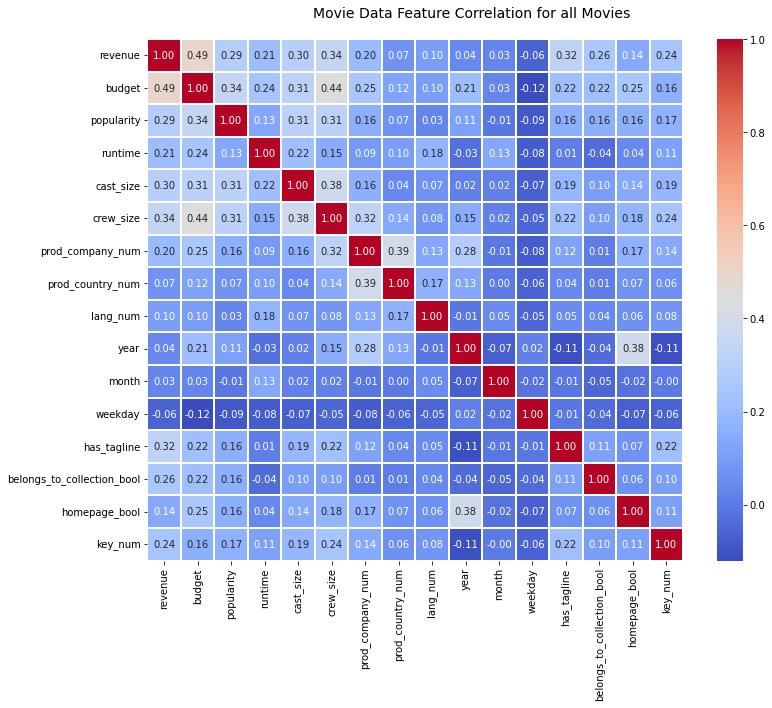

In [30]:

#correlation matrix 
corrmat = df[['revenue','budget','popularity','runtime','cast_size','crew_size','prod_company_num','prod_country_num','lang_num',
              'year','month','weekday','has_tagline',
             'belongs_to_collection_bool','homepage_bool','key_num']].corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Data Feature Correlation for all Movies', fontsize=14)

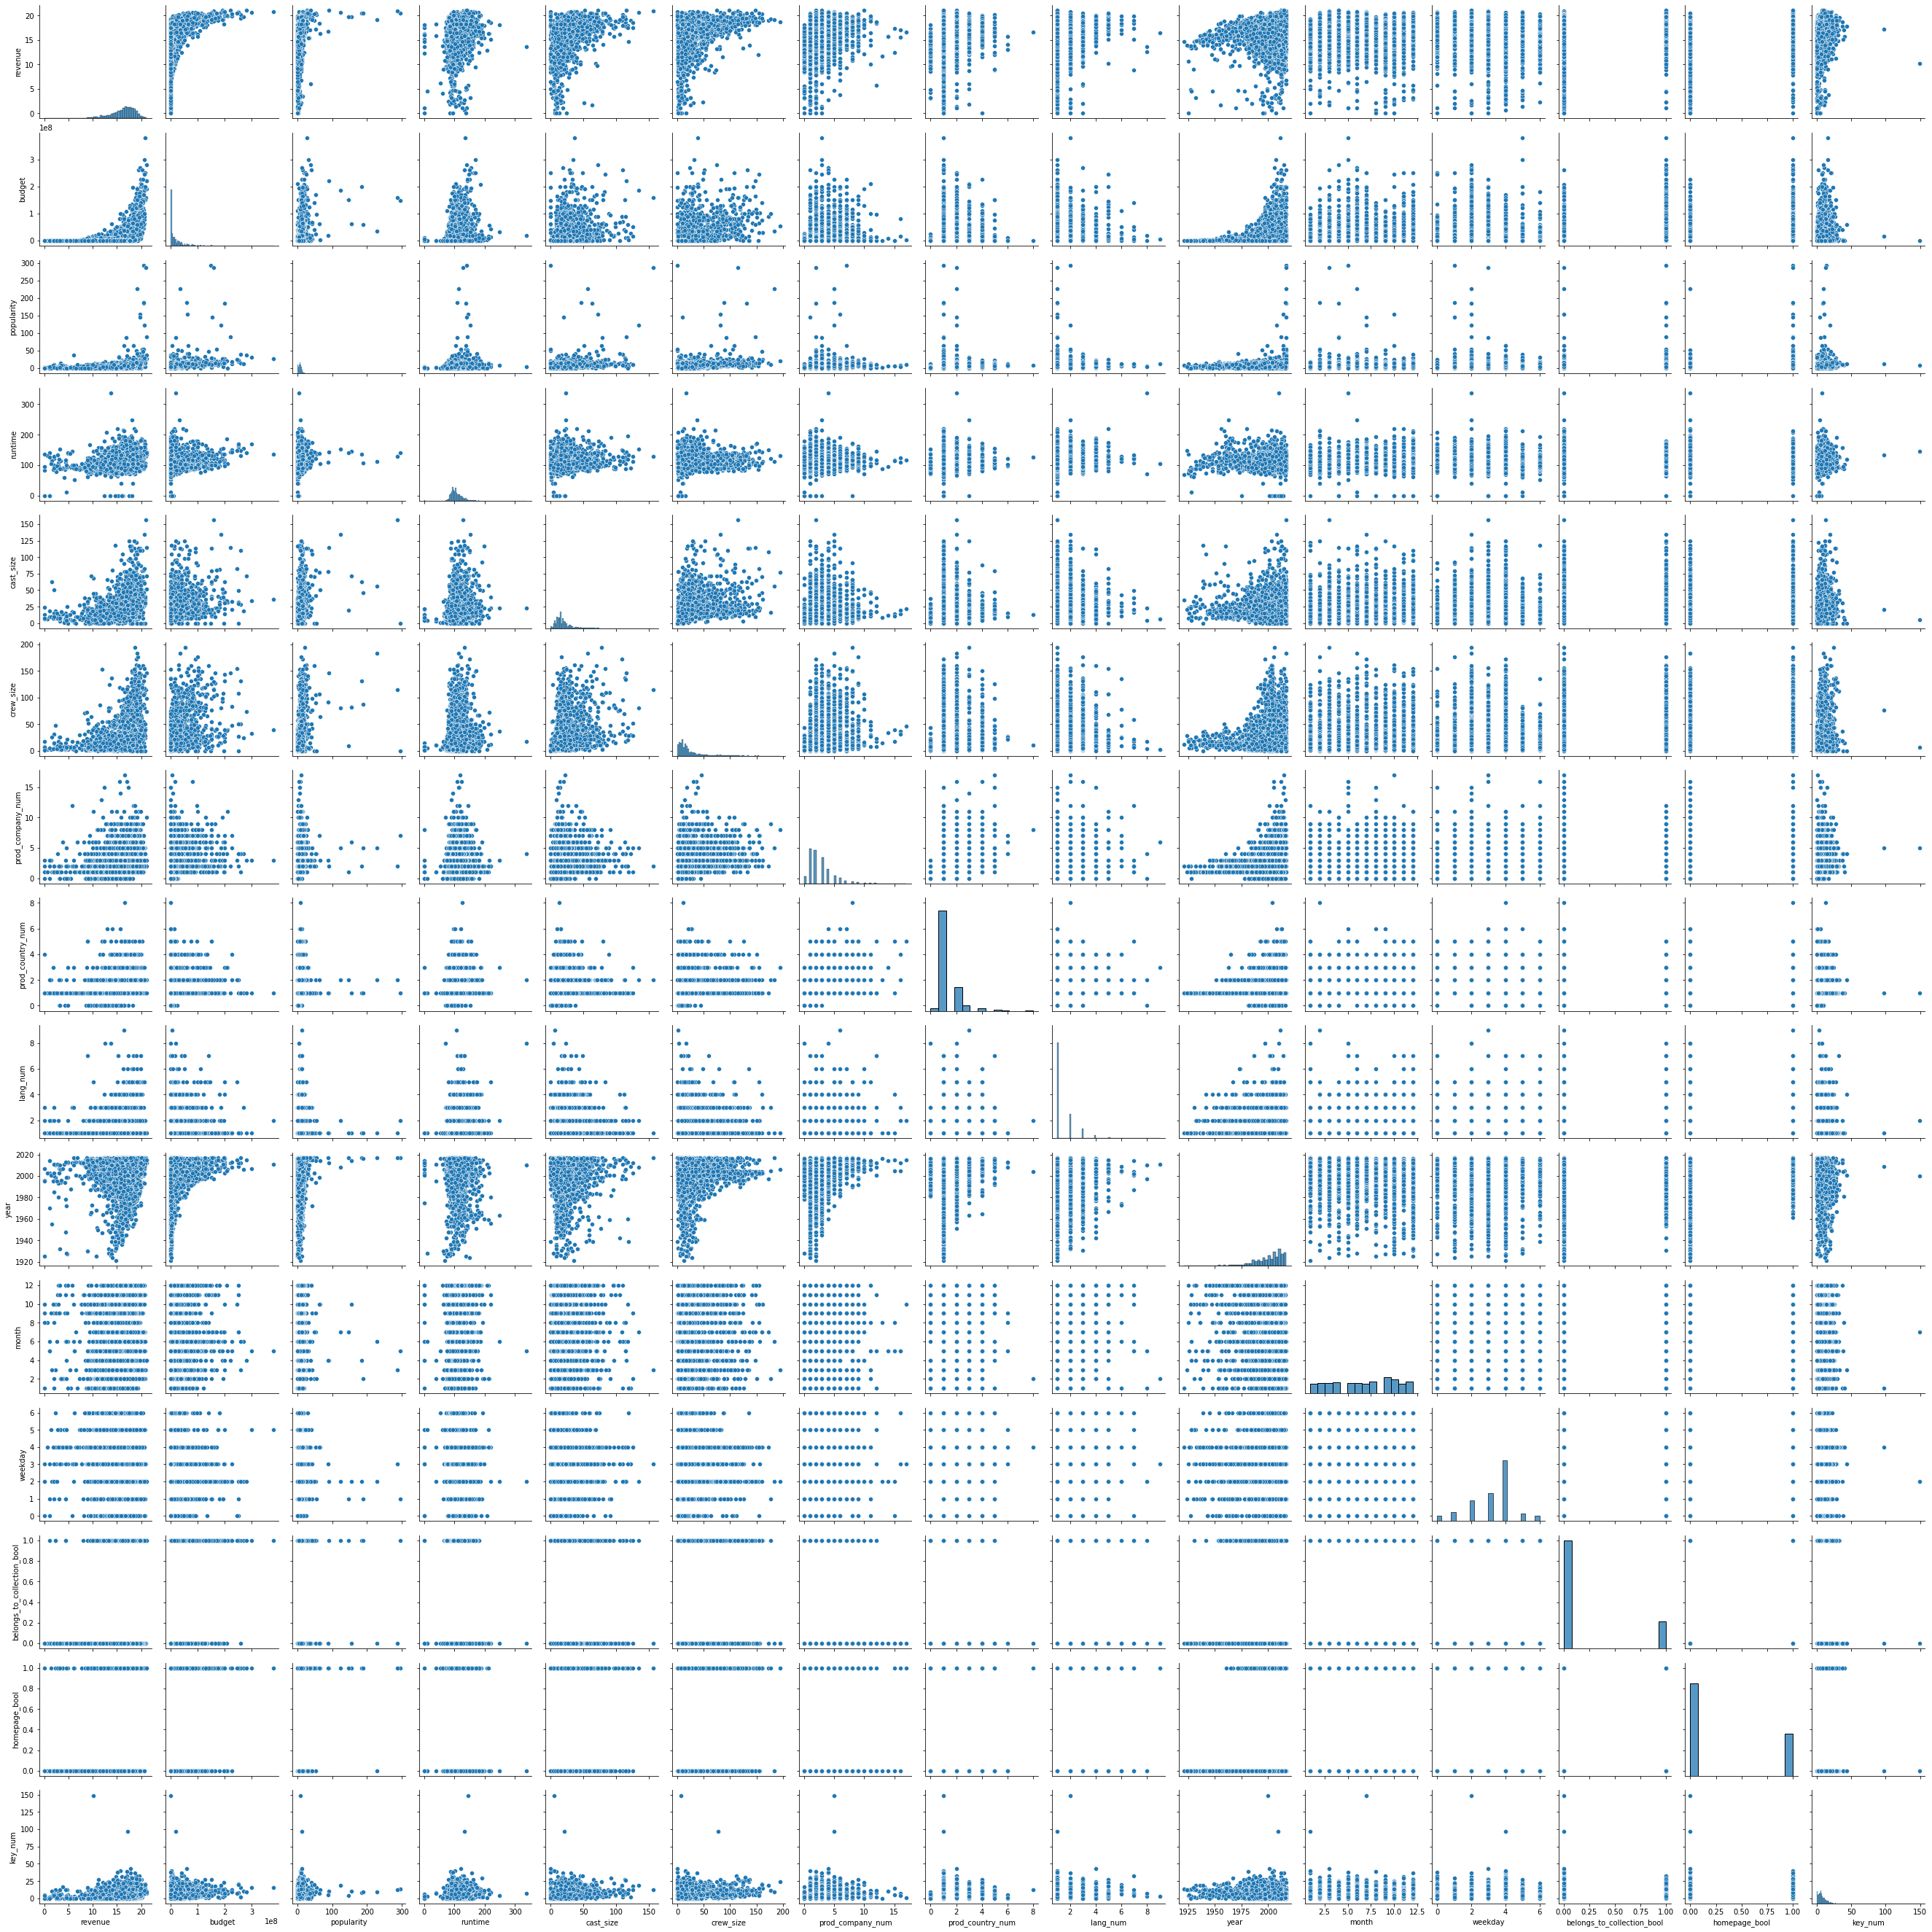

In [31]:
#pairplot
sns.pairplot(df[['revenue','budget','popularity','runtime','cast_size','crew_size','prod_company_num','prod_country_num','lang_num',
                 'year','month','weekday','belongs_to_collection_bool','homepage_bool','key_num']])
plt.show()

In [32]:
print(df.columns)
print(df.shape)

Index(['budget', 'original_language', 'popularity', 'runtime', 'revenue',
       'homepage_bool', 'belongs_to_collection_bool', 'prod_company_num',
       'prod_country_num', 'prod_United States of America',
       ...
       'Music', 'Mystery', 'None', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'key_num'],
      dtype='object', length=195)
(3000, 195)


Ultimately, thanks to the addition of many new dummy variables for genre, our dataset has widened, but we have also rid ourselves of a lot of unnecessary features moving into the next stages of our modeling.

We've also added a few other features as inspired by our pairplots.

In [33]:
# save the data to movies_post_eda csv file
df.to_csv('movies_post_eda.csv',index=False)